In [ ]:
import sklearn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# sns set up
plt.rcParams["font.family"] = "Arial"
sns.set_style("whitegrid")
sns.set_palette("bright")

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")
print(f"Training set features: {diabetes.feature_names}")
print(f"Target set shape: {y_train.shape}, Testing set shape: {y_test.shape}")

Training set shape: (353, 10), Testing set shape: (89, 10)
Training set features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target set shape: (353,), Testing set shape: (89,)


In [ ]:
dataset_description = diabetes.DESCR
print(dataset_description)
feature_rename = {
    "age": "Age",
    "sex": "Sex",
    "bmi": "BMI",
    "bp": "Blood Pressure",
    "s1": "Total Cholesterol",
    "s2": "LDL",
    "s3": "HDL",
    "s4": "Triglycerides",
    "s5": "Glucose",
    "s6": "Insulin",
}



.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
X_pd = pd.DataFrame(X, columns=diabetes.feature_names)
y_pd = pd.DataFrame(y, columns=["progression"])

X_pd = X_pd.rename(columns=feature_rename)

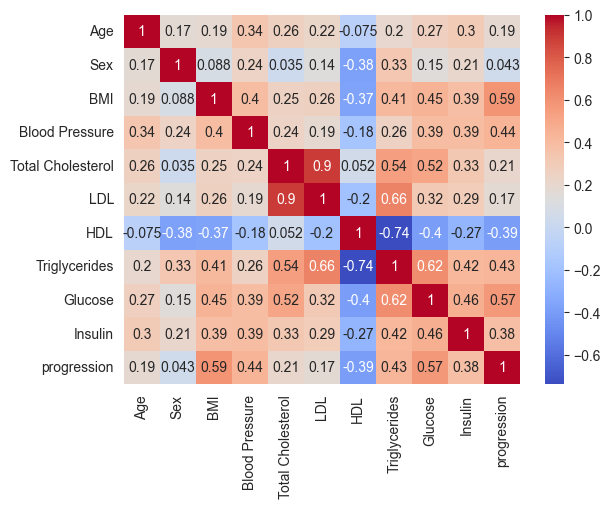

In [ ]:
data = X_pd.join(y_pd)
corr_matrix = data.corr(method="pearson")

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


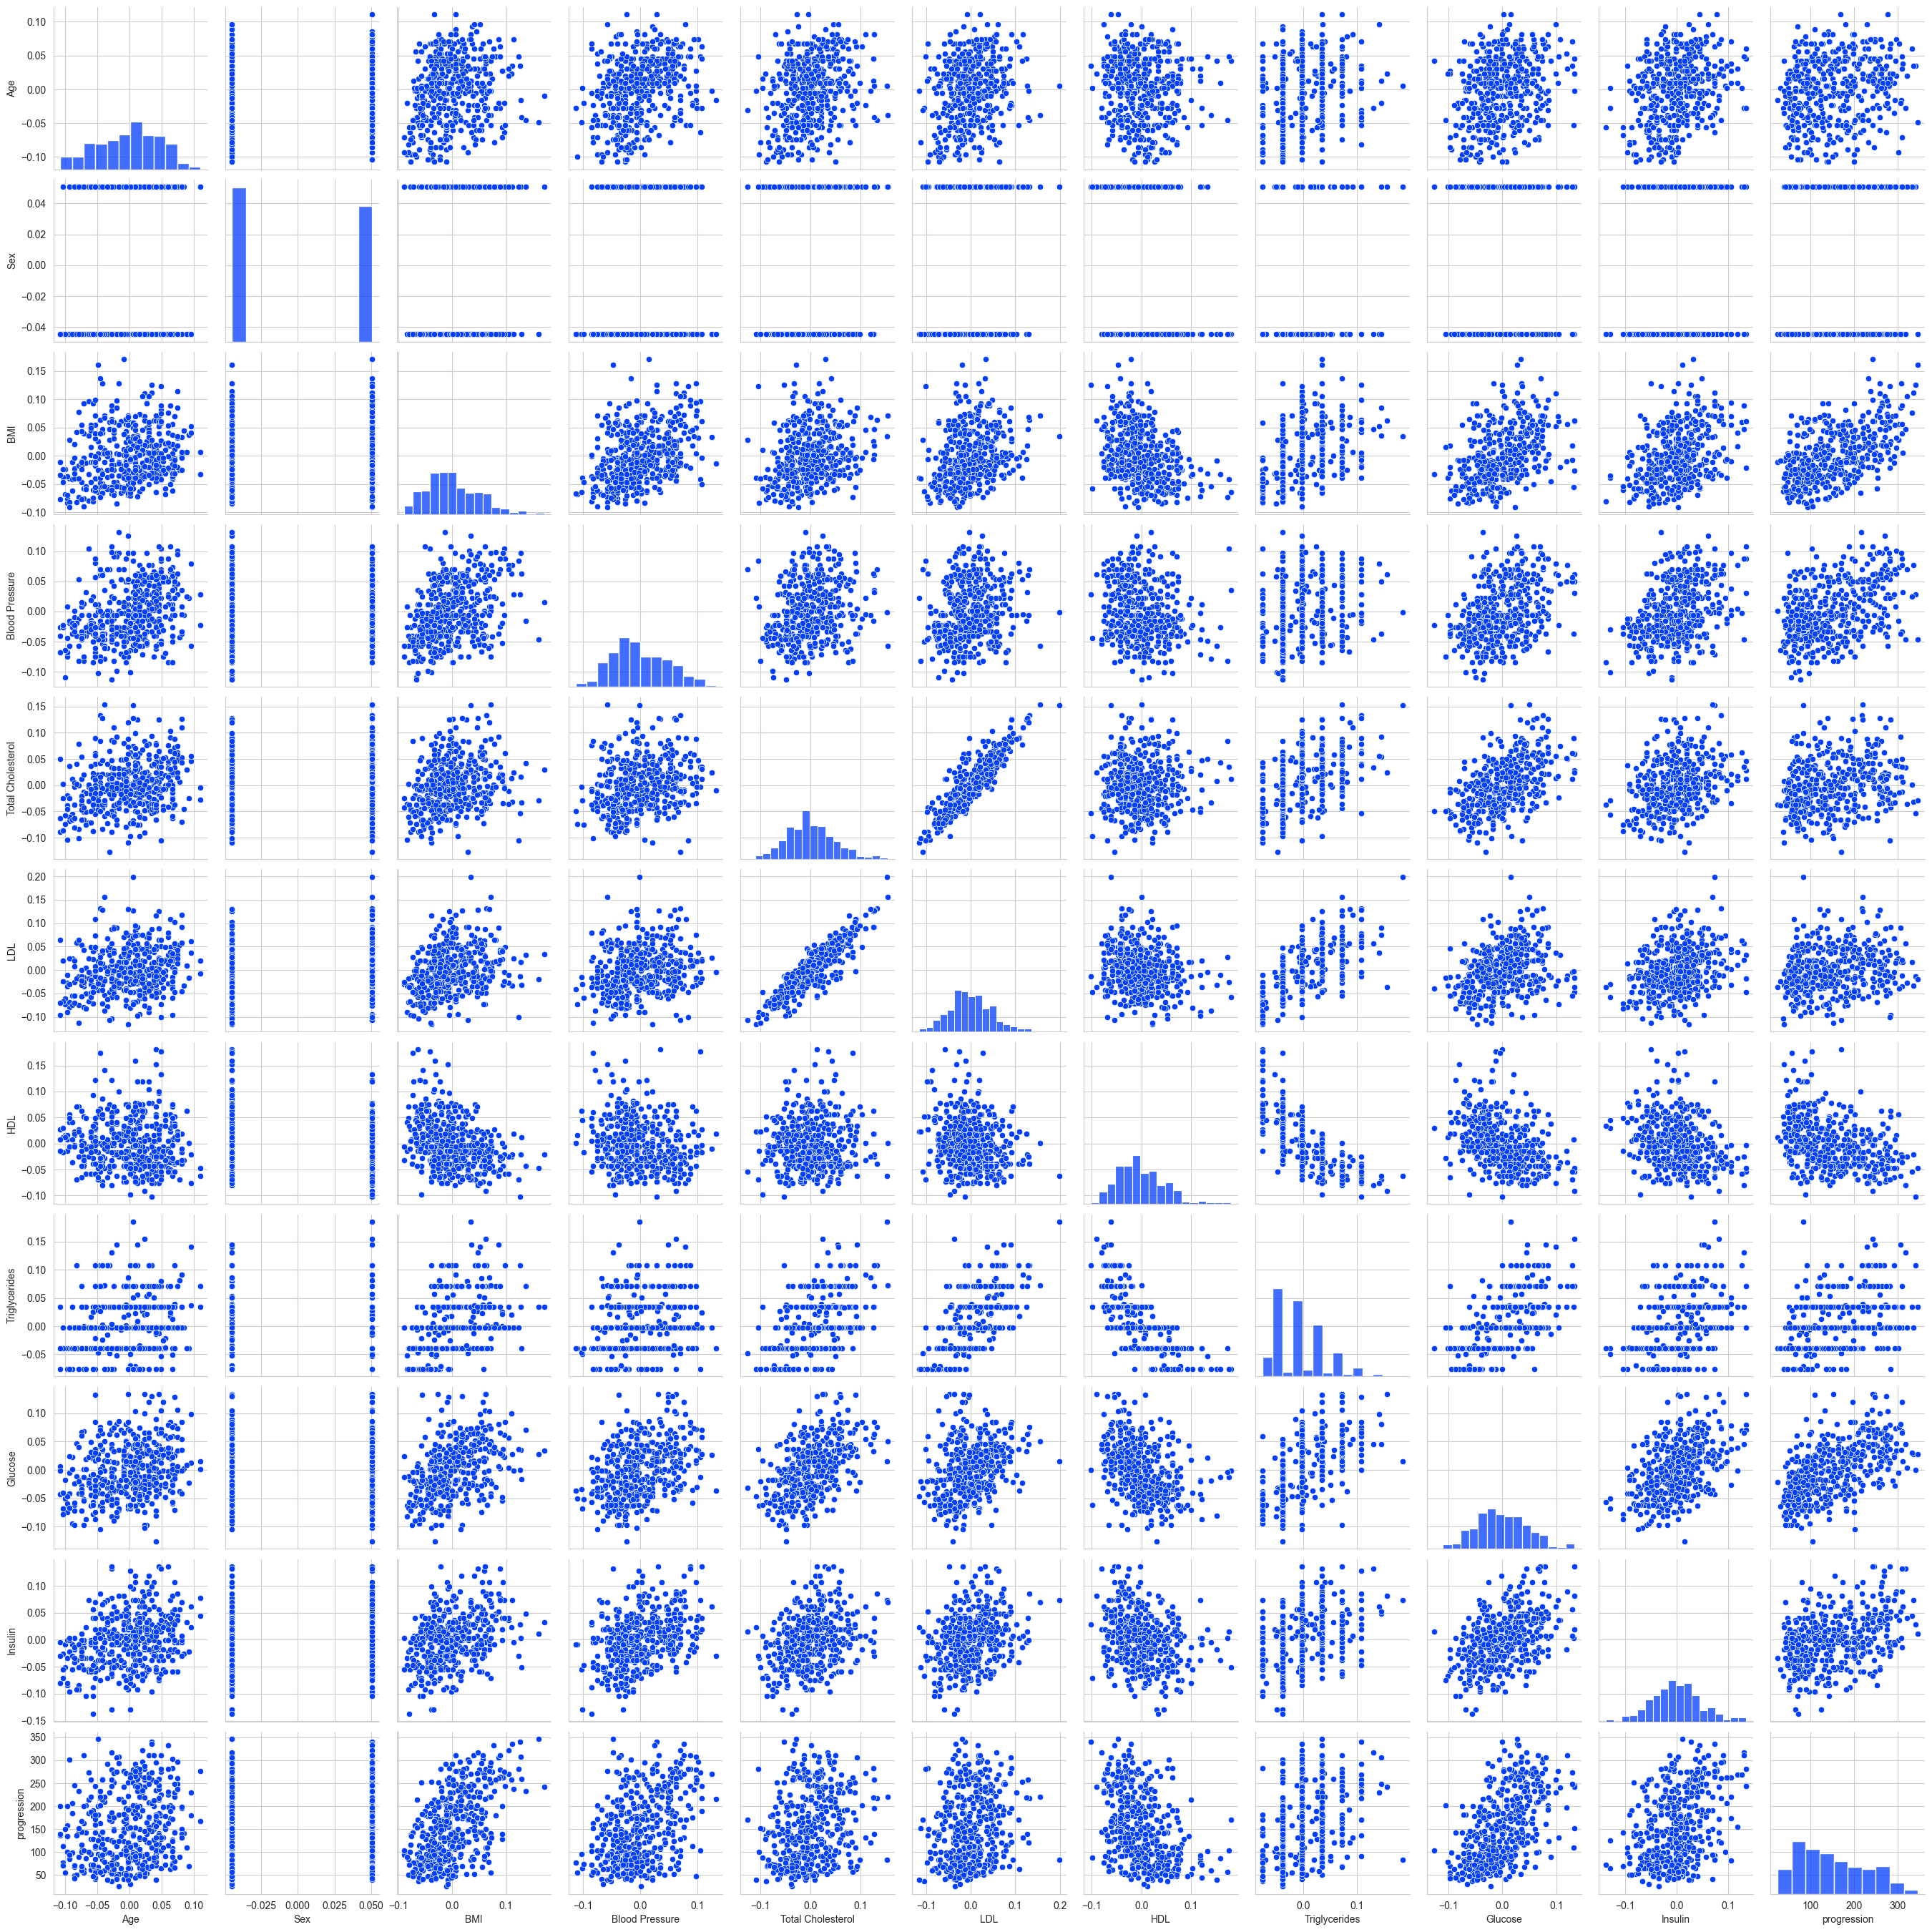

In [ ]:
# Create a pairplot of the features

sns.pairplot(data)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Compute the median of the target variable
median_target_test = np.median(y_test)
print(median_target_test)

129.0


In [ ]:
# Compute the mean absolute error
mae = np.mean(np.abs(y_test - median_target_test))
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 62.21348314606742


In [ ]:
# Compute the root mean squared error
# import math
# rmse2 = math.sqrt(mae(y_test, [median_target_test for _ in range(len(y_test))]))
# print(f"Root Mean Squared Error: {rmse2}")

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 53.85344583676593


In [ ]:
# Compute the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Percentage Error: 37.49982636756113%


In [ ]:
# Evaluate the inference model with the test data
y_pred = model.predict(X_test)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error: {mae}")
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mse}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error: {mape}%")


Mean Absolute Error: 42.79409467959994
Mean Squared Error: 53.85344583676593
Mean Absolute Percentage Error: 37.49982636756113%


Model is better than baseline, It doesn't mean that model is correct at the domain level.

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


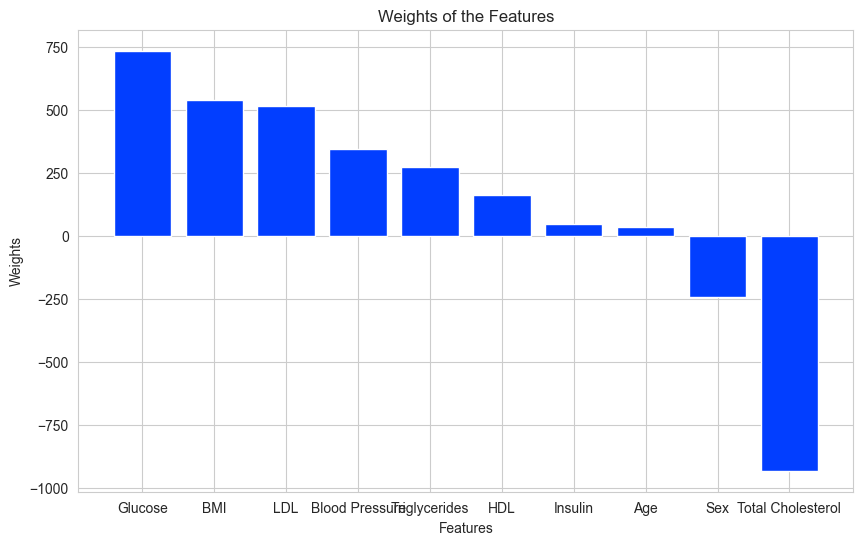

In [55]:
# Interpretation of the inference model
# 1. Model is better than baseline, It doesn't mean that model is correct at the domain level.
# 2. Model is overfitting the data.
# 3. Model is not generalizing well to the new data.
# 4. Model is not robust to the new data.
# 5. Model is not able to capture the non-linear relationship between the features and the target.

weights = model.coef_
print(weights)

# Sort the weights in descending order
feature_importance_idx = np.argsort(weights)[::-1]

# Plot the weights
plt.figure(figsize=(10, 6))
plt.bar(x=X_pd.columns[feature_importance_idx], height=weights[feature_importance_idx])
plt.xlabel("Features")
plt.ylabel("Weights")
plt.title("Weights of the Features")
plt.show()


Figure is showing
- Total cholestrerol is the most important feature. Having cholesterol decreases the diabetis. 